In [7]:
from knnor import data_augment
import numpy as np
import math
import random
from copy import deepcopy


import os
import yaml
import argparse
import numpy as np
from pathlib import Path
from models import *
from experiment import VAEXperiment
import torch.backends.cudnn as cudnn
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.utilities.seed import seed_everything
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint
from dataset import VAEDataset
from pytorch_lightning.plugins import DDPPlugin

import matplotlib.pyplot as plt

In [8]:
model_nm="VanillaVAE"
args_filename="configs/vae.yaml"
with open(args_filename, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

In [9]:
model = vae_models[config['model_params']['name']](**config['model_params'])

device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
chk_path="logs/"+model_nm+"/version_2/checkpoints/last.ckpt"

checkpoint = torch.load(chk_path,map_location=torch.device(device))

with torch.no_grad():
    for nm,params in model.named_parameters():
        print(nm)
        print("model."+nm in checkpoint["state_dict"])
        keyy="model."+nm 
        params.data=checkpoint["state_dict"][keyy]

encoder.0.0.weight
True
encoder.0.0.bias
True
encoder.0.1.weight
True
encoder.0.1.bias
True
encoder.1.0.weight
True
encoder.1.0.bias
True
encoder.1.1.weight
True
encoder.1.1.bias
True
encoder.2.0.weight
True
encoder.2.0.bias
True
encoder.2.1.weight
True
encoder.2.1.bias
True
encoder.3.0.weight
True
encoder.3.0.bias
True
encoder.3.1.weight
True
encoder.3.1.bias
True
encoder.4.0.weight
True
encoder.4.0.bias
True
encoder.4.1.weight
True
encoder.4.1.bias
True
fc_mu.weight
True
fc_mu.bias
True
fc_var.weight
True
fc_var.bias
True
decoder_input.weight
True
decoder_input.bias
True
decoder.0.0.weight
True
decoder.0.0.bias
True
decoder.0.1.weight
True
decoder.0.1.bias
True
decoder.1.0.weight
True
decoder.1.0.bias
True
decoder.1.1.weight
True
decoder.1.1.bias
True
decoder.2.0.weight
True
decoder.2.0.bias
True
decoder.2.1.weight
True
decoder.2.1.bias
True
decoder.3.0.weight
True
decoder.3.0.bias
True
decoder.3.1.weight
True
decoder.3.1.bias
True
final_layer.0.weight
True
final_layer.0.bias
True
fi

In [21]:

X_vals_enc_arr=np.load("logs/"+model_nm+"/enc/test_aug_enc.npy")

In [22]:
with torch.no_grad():
    
    mu=X_vals_enc_arr[:,:128]
    log_var=X_vals_enc_arr[:,128:]

    mu=torch.tensor(mu)
    log_var=torch.tensor(log_var)
    print(mu.shape,log_var.shape)
    z = model.reparameterize(mu, log_var)    
    images=model.decode(z)    

torch.Size([250, 128]) torch.Size([250, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


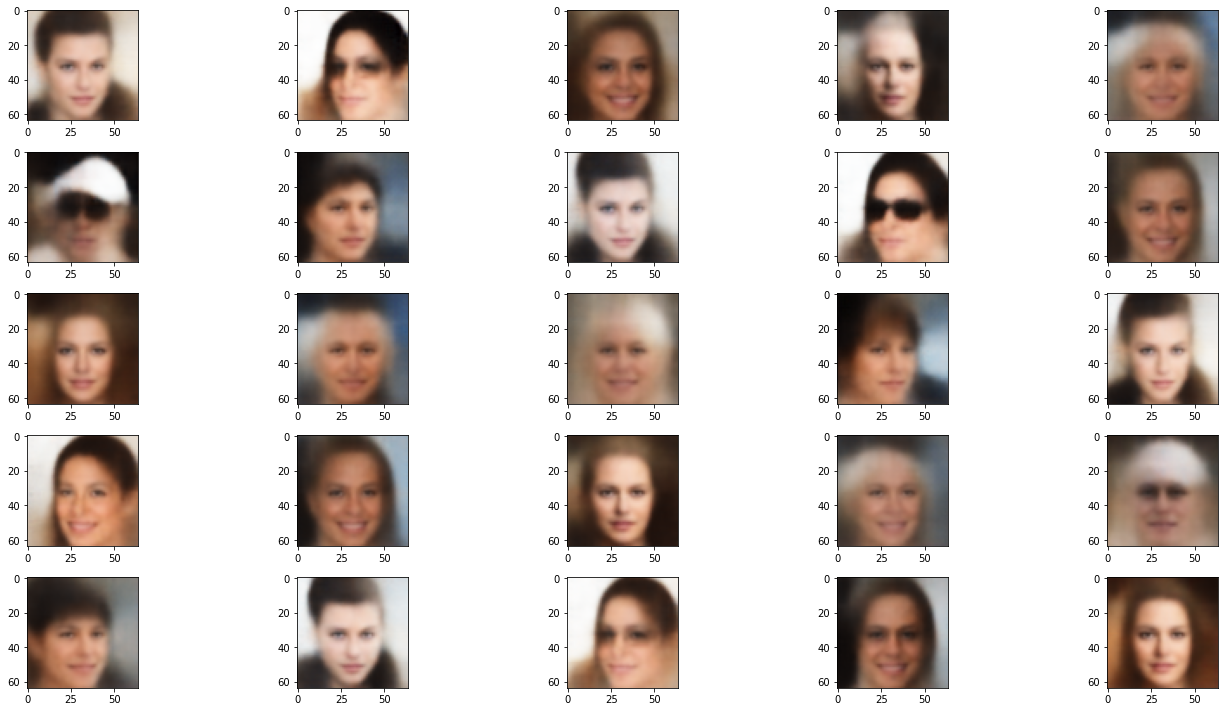

In [23]:
num_rows=5
num_cols=5
how_many=num_rows*num_cols

random_indices = np.random.choice(len(images), size=how_many, replace=False)

images_selected = images[random_indices, :]
fig, axs = plt.subplots(num_rows,num_cols)
fig.set_size_inches(20, 10)


for i in range(num_rows):
    for j in range(num_cols):
        axs[i][j].imshow(images[i*num_cols+j].permute(1,2,0))

plt.tight_layout()
plt.show()        

In [13]:
images_selected.shape

torch.Size([81, 3, 64, 64])

In [ ]:


plt.imshow(images[31].permute(1,2,0))

In [ ]:
X_vals_enc_arr.shape